In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)


In [23]:
url = "https://raw.githubusercontent.com/sourav277/1Decision-Tree-CART-VS-ID3-/refs/heads/main/data/heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.fillna(df.mode().iloc[0], inplace=True)


In [26]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [8]:
encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = encoder.fit_transform(df[col])


In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
cart = DecisionTreeClassifier(criterion='gini', random_state=42)

param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,5,10]
}

cart_cv = GridSearchCV(cart, param_grid, cv=5)
cart_cv.fit(X_train, y_train)

cart_best = cart_cv.best_estimator_


In [15]:
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)

id3_cv = GridSearchCV(id3, param_grid, cv=5)
id3_cv.fit(X_train, y_train)

id3_best = id3_cv.best_estimator_


In [16]:
cart_pred = cart_best.predict(X_test)
id3_pred = id3_best.predict(X_test)


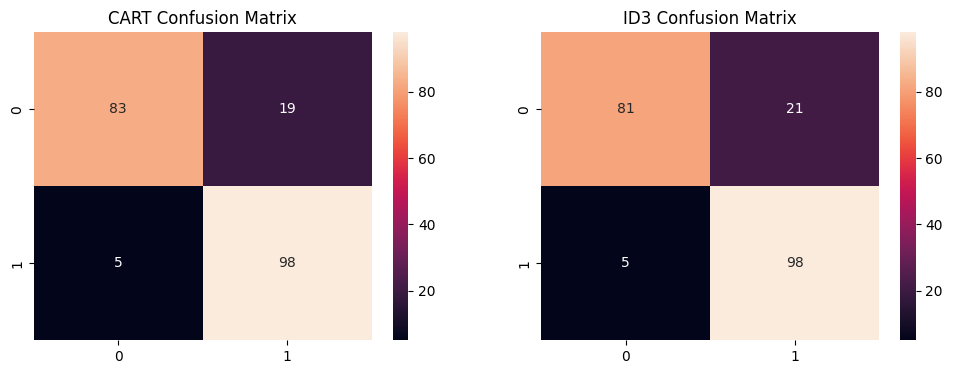

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(confusion_matrix(y_test, cart_pred),
            annot=True, fmt='d', ax=axes[0])
axes[0].set_title("CART Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, id3_pred),
            annot=True, fmt='d', ax=axes[1])
axes[1].set_title("ID3 Confusion Matrix")

plt.show()


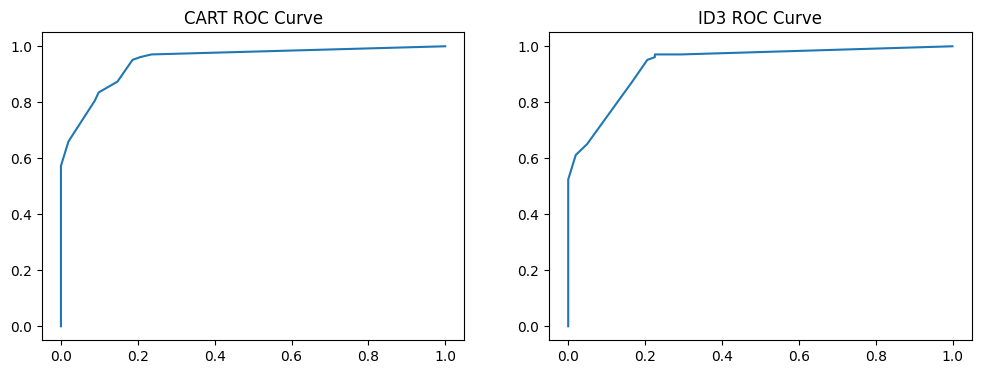

In [19]:
cart_prob = cart_best.predict_proba(X_test)[:,1]
id3_prob = id3_best.predict_proba(X_test)[:,1]

fpr_c, tpr_c, _ = roc_curve(y_test, cart_prob)
fpr_i, tpr_i, _ = roc_curve(y_test, id3_prob)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(fpr_c, tpr_c, label="CART")
plt.title("CART ROC Curve")

plt.subplot(1,2,2)
plt.plot(fpr_i, tpr_i, label="ID3")
plt.title("ID3 ROC Curve")

plt.show()


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

fpr, tpr, _ = roc_curve(y_test, cart_prob)
axes[0].plot(fpr, tpr)
axes[0].set_title("CART ROC Curve")

fpr, tpr, _ = roc_curve(y_test, id3_prob)
axes[1].plot(fpr, tpr)
axes[1].set_title("ID3 ROC Curve")

plt.show()


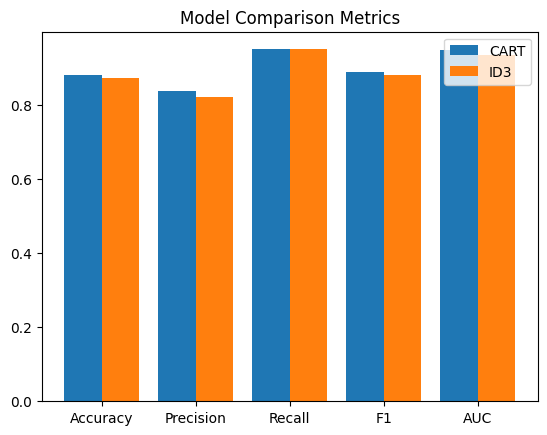

In [27]:
metrics = ['Accuracy','Precision','Recall','F1','AUC']

cart_scores = [
    accuracy_score(y_test, cart_pred),
    precision_score(y_test, cart_pred),
    recall_score(y_test, cart_pred),
    f1_score(y_test, cart_pred),
    auc(fpr_c, tpr_c)
]

id3_scores = [
    accuracy_score(y_test, id3_pred),
    precision_score(y_test, id3_pred),
    recall_score(y_test, id3_pred),
    f1_score(y_test, id3_pred),
    auc(fpr_i, tpr_i)
]

x = np.arange(len(metrics))
plt.bar(x-0.2, cart_scores, 0.4, label='CART')
plt.bar(x+0.2, id3_scores, 0.4, label='ID3')

plt.xticks(x, metrics)
plt.legend()
plt.title("Model Comparison Metrics")
plt.show()


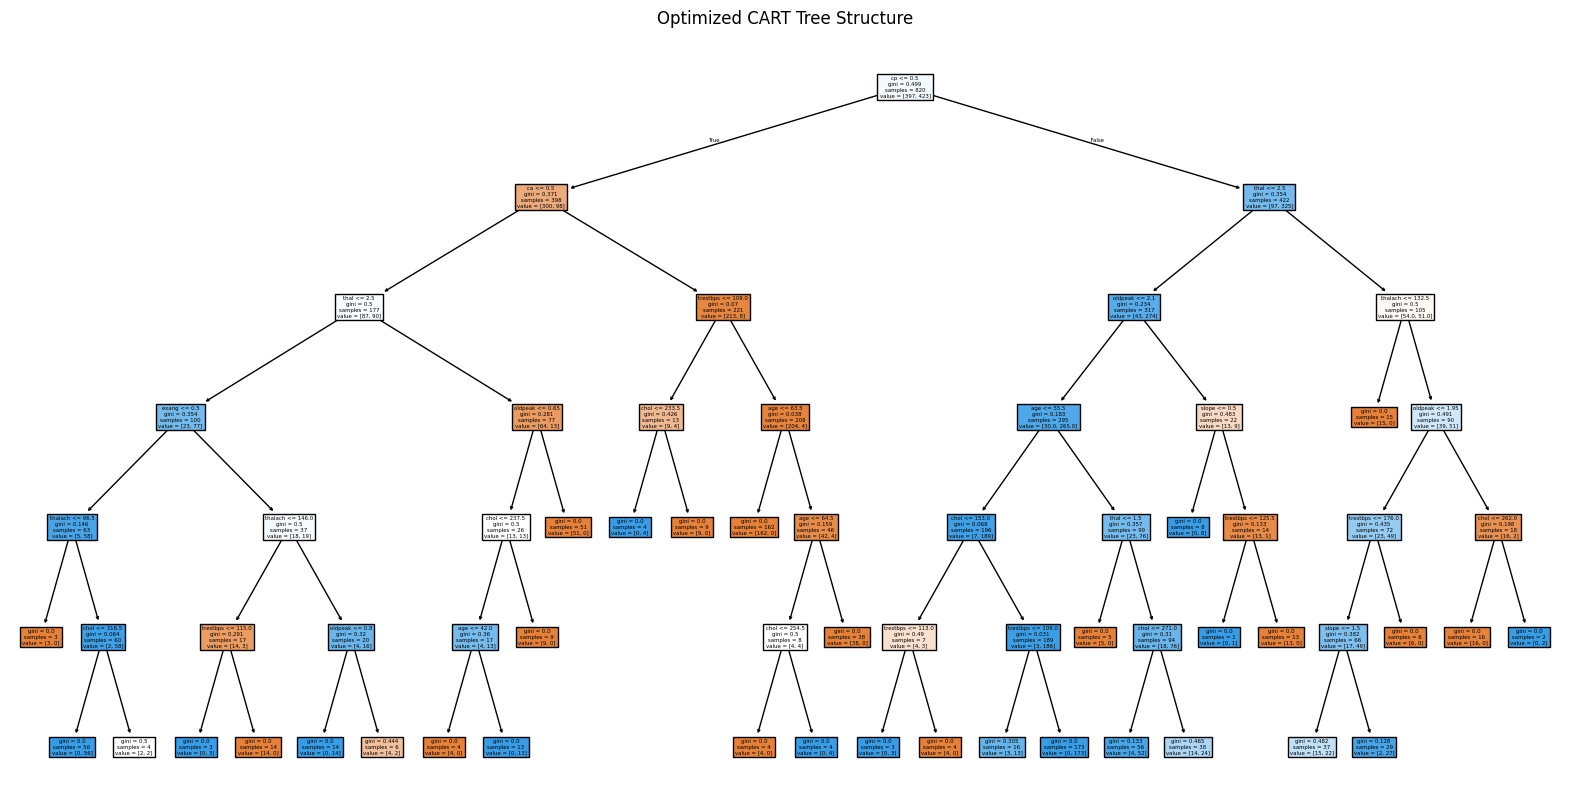

In [21]:
plt.figure(figsize=(20,10))
plot_tree(cart_best, feature_names=X.columns, filled=True)
plt.title("Optimized CART Tree Structure")
plt.show()
